# Binary classification based on Logistic Regression using non-linear regression function

## import library

In [301]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## load data

In [302]:
fname_data1 = 'assignment_09_data1.txt'
fname_data2 = 'assignment_09_data2.txt'

data1 = np.genfromtxt(fname_data1, delimiter=',')
data2 = np.genfromtxt(fname_data2, delimiter=',')

# data[:,0] : x
# data[:,1] : y
# data[:,2] : label {0, 1}

## plot the data

In [303]:
def plot_data(data):
    plt.figure(figsize = (8, 6))
    plt.plot(data[data[:, 2]==0, :][:, 0], data[data[:, 2]==0, :][:, 1],
             '.', color = 'blue', label = 'class = 0')
    plt.plot(data[data[:, 2]==1, :][:, 0], data[data[:, 2]==1, :][:, 1],
             '.', color = 'red', label = 'class = 1')
    plt.legend(loc = 'upper right')
    plt.tight_layout()
    plt.show()

## define the feature function for each data to obtain the best accuracy

In [304]:
def feature_function1(x, y):
    feature = np.zeros((len(x), 3))
    feature[:, 0] = x ** 2
    feature[:, 1] = y ** 2
    feature[:, 2] = x ** 2 + y ** 2
    
    return feature

In [305]:
def feature_function2(x, y):
    feature = np.zeros((len(x), 6))
    feature[:, 0] = x ** 2 + y ** 2
    feature[:, 1] = x ** 3 + y ** 3
    feature[:, 2] = (np.abs(x) + np.abs(y))**3
    feature[:, 3] = (x * y)**2
    feature[:, 4] = (x + y)**2
    feature[:, 5] = np.exp(-15 * ((x + y)**2))
    
    return feature

## define regression function with a vector $\theta$ model parameters and input data 

In [306]:
def regression_function(theta, feature):
    value = feature @ theta
    
    return value

## define sigmoid function with input $x$

In [307]:
def logistic_function(x):
    z = 1 / (1 + np.exp(-x))
    
    return z

## define loss function with feature and label based on the logistic regression

In [308]:
def compute_loss_feature(theta, feature, label):
    loss = (1/len(label)) * (((-label).T @ np.log(feature+1e-6)) - ((1-label).T @ np.log(1-feature+1e-6)))
    
    return loss

## define gradient vector for the model parameters $\theta$

In [309]:
def compute_gradient_feature(theta, feature, label):
    gradient = (1/len(label)) * (feature.T @ (logistic_function(feature @ theta) - label))

    return gradient

## compute the accuracy

In [310]:
def compute_accuracy(theta, feature, label):
    value = regression_function(theta, feature)
    sig_value = logistic_function(value)
    sig_value[sig_value >= 0.5] = 1
    sig_value[sig_value < 0.5] = 0
    
    cnt = 0
    for i in range(len(label)):
        if sig_value[i] == label[i]:
            cnt += 1

    accuracy = cnt / len(label)
    
    return accuracy

## gradient descent for the model parameters $\theta$

In [311]:
num_iteration   = 30000       # USE THIS VALUE for the number of gradient descent iterations 
learning_rate   = 0.1        # USE THIS VALUE for the learning rate
num_iteration2   = 150000       # USE THIS VALUE for the number of gradient descent iterations 
learning_rate2   = 0.2        # USE THIS VALUE for the learning rate
theta1 = np.array((0, 0, 0, 0))
theta1 = theta1[:, np.newaxis]
theta2 = np.array((0, 0, 0, 0, 0, 0, 0))
theta2 = theta2[:, np.newaxis]
one1 = np.ones((len(data1), 1))
one2 = np.ones((len(data2), 1))

# loss iteration
loss_iteration1 = np.zeros(num_iteration)
loss_iteration2 = np.zeros(num_iteration2)

# theta iteration
theta_iteration1 = np.zeros((num_iteration, theta1.size))
theta_iteration2 = np.zeros((num_iteration2, theta2.size))

In [299]:
# data1 feature
feature1 = feature_function1(data1[:, 0], data1[:, 1])
feature1 = np.hstack((one1, feature1))
label1 = data1[:, 2]
label1 = label1[:, np.newaxis]

# data2 feature
feature2 = feature_function2(data2[:, 0], data2[:, 1])
feature2 = np.hstack((one2, feature2))
label2 = data1[:, 2]
label2 = label2[:, np.newaxis]

In [312]:
print('---------data1---------')
for i in range(num_iteration):
    value1 = regression_function(theta1, feature1)
    h1 = logistic_function(value1)
    loss1 = compute_loss_feature(theta1, h1, label1)
    theta1 = theta1 - learning_rate * compute_gradient_feature(theta1, feature1, label1)
    loss_iteration1[i] = loss1
    theta_iteration1[i] = np.squeeze(theta1)
    
    if i % 2000 == 0:
        print(f"iteration : {i}, loss : {loss1}")
        
print('---------data2---------')
for i in range(num_iteration2):
    value2 = regression_function(theta2, feature2)
    h2 = logistic_function(value2)
    loss2 = compute_loss_feature(theta2, h2, label2)
    theta2 = theta2 - learning_rate2 * compute_gradient_feature(theta2, feature2, label2)
    loss_iteration2[i] = loss2
    theta_iteration2[i] = np.squeeze(theta2)
    
    if i % 5000 == 0:
        print(f"iteration : {i}, loss : {loss2}")

theta1_optimal = theta1
theta2_optimal = theta2

---------data1---------
iteration : 0, loss : [[0.69314518]]
iteration : 2000, loss : [[0.03023228]]
iteration : 4000, loss : [[0.01870127]]
iteration : 6000, loss : [[0.01455048]]
iteration : 8000, loss : [[0.01236484]]
iteration : 10000, loss : [[0.01099957]]
iteration : 12000, loss : [[0.01005843]]
iteration : 14000, loss : [[0.00936652]]
iteration : 16000, loss : [[0.00883415]]
iteration : 18000, loss : [[0.00841044]]
iteration : 20000, loss : [[0.00806425]]
iteration : 22000, loss : [[0.00777541]]
iteration : 24000, loss : [[0.00753029]]
iteration : 26000, loss : [[0.00731928]]
iteration : 28000, loss : [[0.00713545]]
---------data2---------
iteration : 0, loss : [[0.69314518]]
iteration : 5000, loss : [[0.17595584]]
iteration : 10000, loss : [[0.16192528]]
iteration : 15000, loss : [[0.15632804]]
iteration : 20000, loss : [[0.15317342]]
iteration : 25000, loss : [[0.15112857]]
iteration : 30000, loss : [[0.14970074]]
iteration : 35000, loss : [[0.1486551]]
iteration : 40000, loss

## compute accuracy of the classifiers

In [313]:
accuracy_classifier1 = compute_accuracy(theta1_optimal, feature1, label1)
accuracy_classifier2 = compute_accuracy(theta2_optimal, feature2, label2)

## plot the results

In [325]:
def plot_loss_curve(loss_iteration, num_iteration):

    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    plt.title('loss')
    plt.plot(list(range(num_iteration)), loss_iteration, '-', color = 'red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    plt.tight_layout()
    plt.show()

In [326]:
def plot_data(data):
    plt.figure(figsize = (8, 8))
    plt.plot(data[data[:, 2]==0, :][:, 0], data[data[:, 2]==0, :][:, 1],
             '.', color = 'blue', label = 'class = 0')
    plt.plot(data[data[:, 2]==1, :][:, 0], data[data[:, 2]==1, :][:, 1],
             '.', color = 'red', label = 'class = 1')
    plt.legend(loc = 'upper right')
    plt.tight_layout()
    plt.show()

In [327]:
def plot_model_parameter(theta_iteration, num_iteration):

    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    plt.plot(list(range(num_iteration)), theta_iteration[:, 0], '-', color = 'red',
             label = r'$\Theta_0$')
    plt.plot(list(range(num_iteration)), theta_iteration[:, 1], '-', color = 'green',
             label = r'$\Theta_1$')
    plt.plot(list(range(num_iteration)), theta_iteration[:, 2], '-', color = 'blue',
             label = r'$\Theta_2$')
    plt.plot(list(range(num_iteration)), theta_iteration[:, 3], '-', color = 'black',
             label = r'$\Theta_3$')
    plt.xlabel('iteration')
    plt.legend(loc = 'center right')
    plt.tight_layout()
    plt.show()

In [328]:
def plot_classifier1(data, theta):
    
    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    
    # plot original data
    plt.plot(data[data[:, 2]==0, :][:, 0], data[data[:, 2]==0, :][:, 1],
             '.', color = 'blue', label = 'class = 0')
    plt.plot(data[data[:, 2]==1, :][:, 0], data[data[:, 2]==1, :][:, 1],
             '.', color = 'red', label = 'class = 1')
    
    # grid
    x = np.arange(-3, 3, 0.1)
    y = np.arange(-4, 4, 0.1)

    grid_x, grid_y = np.meshgrid(x, y)

    feature = feature_function1(grid_x.flatten(), grid_y.flatten())

    one = np.ones((len(feature), 1))
    feature = np.hstack((one, feature))

    value = regression_function(theta, feature)
    sig_value = logistic_function(value)
    grid_z = sig_value.reshape(grid_x.shape)
    
    c = plt.contourf(grid_x, grid_y, grid_z, levels = np.linspace(0, 1, 100), cmap = 'RdBu_r',
                    vmin = 0, vmax = 1)
    plt.contour(grid_x, grid_y, grid_z, levels = [.5], cmap = 'Dark2',
                vmin = 0, vmax = 1)
    plt.colorbar(c)
    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [329]:
def plot_classifier2(data, theta):
    
    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    # plot original data
    plt.plot(data[data[:, 2]==0, :][:, 0], data[data[:, 2]==0, :][:, 1],
             '.', color = 'blue', label = 'class = 0')
    plt.plot(data[data[:, 2]==1, :][:, 0], data[data[:, 2]==1, :][:, 1],
             '.', color = 'red', label = 'class = 1')
    
    # grid
    x = np.arange(-2, 3, 0.1)
    y = np.arange(-1, 2, 0.1)
    
    grid_x, grid_y = np.meshgrid(x, y)

    feature = feature_function2(grid_x.flatten(), grid_y.flatten())

    one = np.ones((len(feature), 1))
    feature = np.hstack((one, feature))

    value = regression_function(theta, feature)
    sig_value = logistic_function(value)
    grid_z = sig_value.reshape(grid_x.shape)
    
    c = plt.contourf(grid_x, grid_y, grid_z, levels = np.linspace(0, 1, 100), cmap = 'RdBu_r',
                    vmin = 0, vmax = 1)
    plt.contour(grid_x, grid_y, grid_z, levels = [.5], cmap = 'Dark2',
                vmin = 0, vmax = 1)
    plt.colorbar(c)
    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

# * results

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

### # 01. plot the input data (data1) from the file [assignment_09_data1.txt] in blue for class 0 and in red for class 1

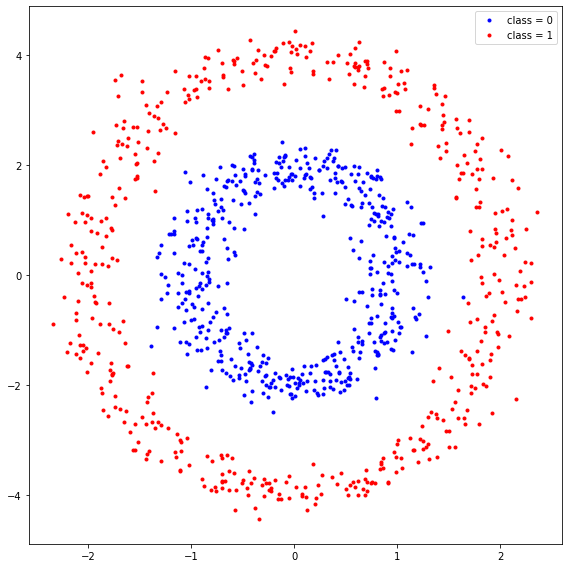

In [319]:
plot_data(data1)

### # 02. plot the input data (data2) from the file [assignment_09_data2.txt] in blue for class 0 and in red for class 1

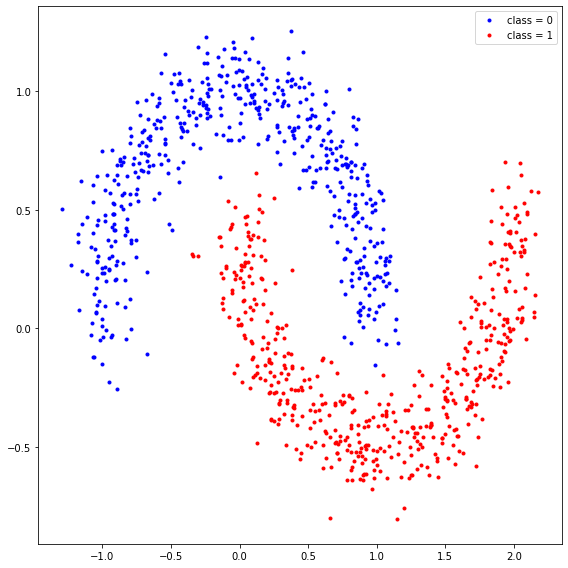

In [320]:
plot_data(data2)

### # 03. plot the values of the model parameters $\theta$ as curves over the gradient descent iterations using different colors for data1

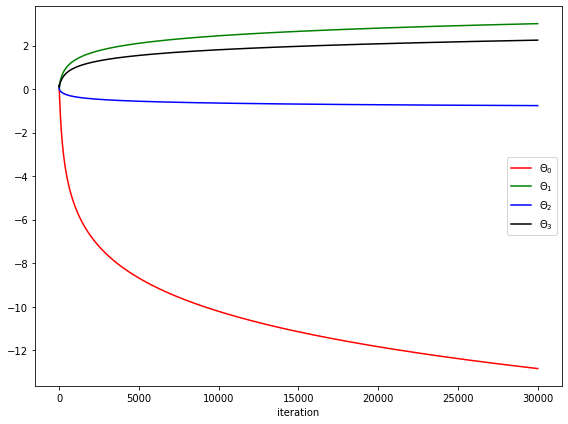

In [330]:
plot_model_parameter(theta_iteration1, num_iteration)

### # 04. plot the values of the model parameters $\theta$ as curves over the gradient descent iterations using different colors for data2

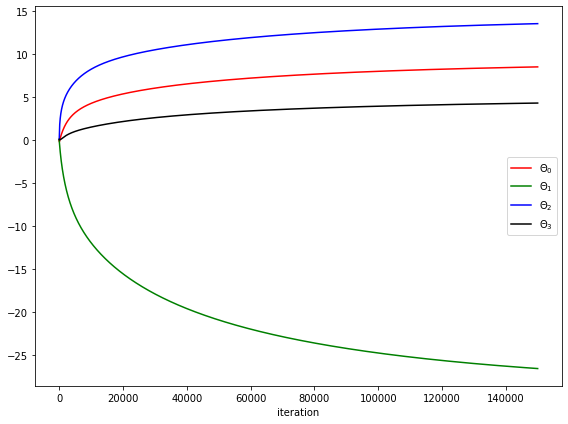

In [331]:
plot_model_parameter(theta_iteration2, num_iteration2)

### # 05. plot the loss values in red curve over the gradient descent iterations for data1

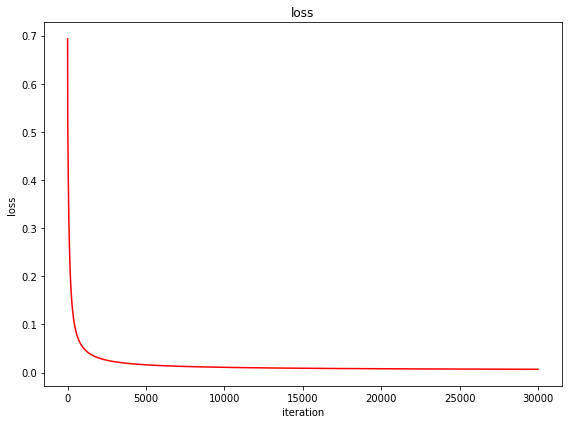

In [333]:
plot_loss_curve(loss_iteration1, num_iteration)

### # 06. plot the loss values in red curve over the gradient descent iterations for data2

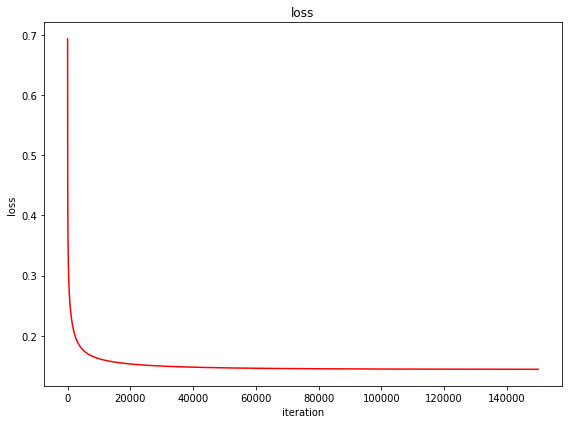

In [334]:
plot_loss_curve(loss_iteration2, num_iteration2)

### # 07. plot the classifier with the given data points superimposed for data1

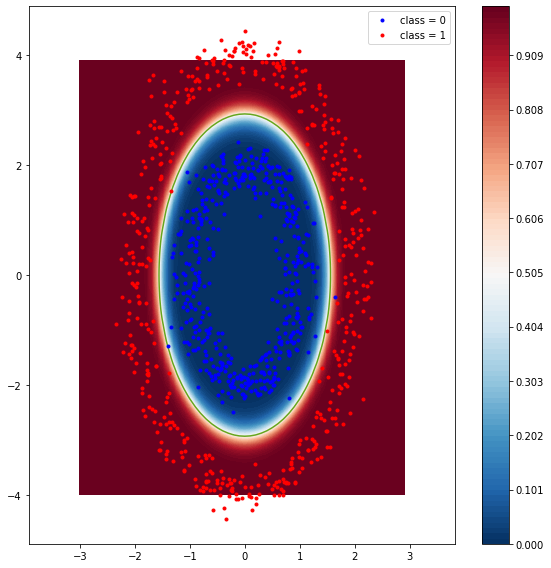

In [335]:
plot_classifier1(data1, theta1_optimal)

### # 08. plot the classifier with the given data points superimposed for data2

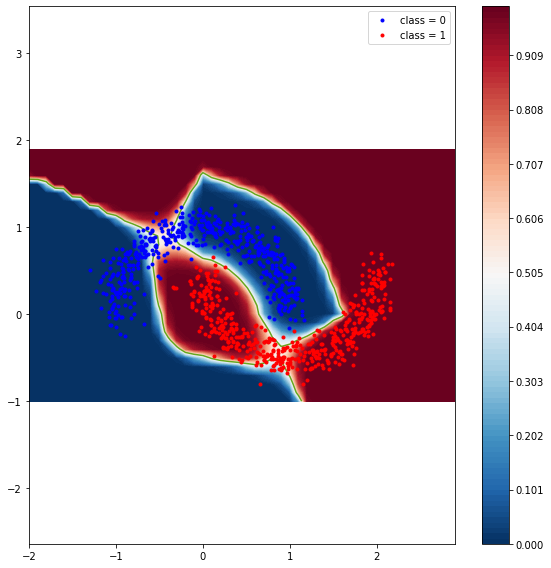

In [336]:
plot_classifier2(data2, theta2_optimal)

### # 09. print out the accuracy of the obtained classifier1 for data1

In [337]:
print(accuracy_classifier1)

0.999


### # 10. print out the accuracy of the obtained classifier2 for data1

In [338]:
print(accuracy_classifier2)

0.929
